<a href="https://colab.research.google.com/github/Seth724/Disease-Prediction---ML/blob/main/Desease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sethnaamanethmi","key":"2759b2491ae682010aee15a87cd3ab95"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!pip install kaggle

In [8]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 43.1MB/s]


In [9]:
import pandas as pd
df=pd.read_csv('/content/heart-disease/heart_disease_uci.csv')


In [10]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [11]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [12]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [13]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns]=df[numeric_columns].fillna(df[numeric_columns].mean())


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

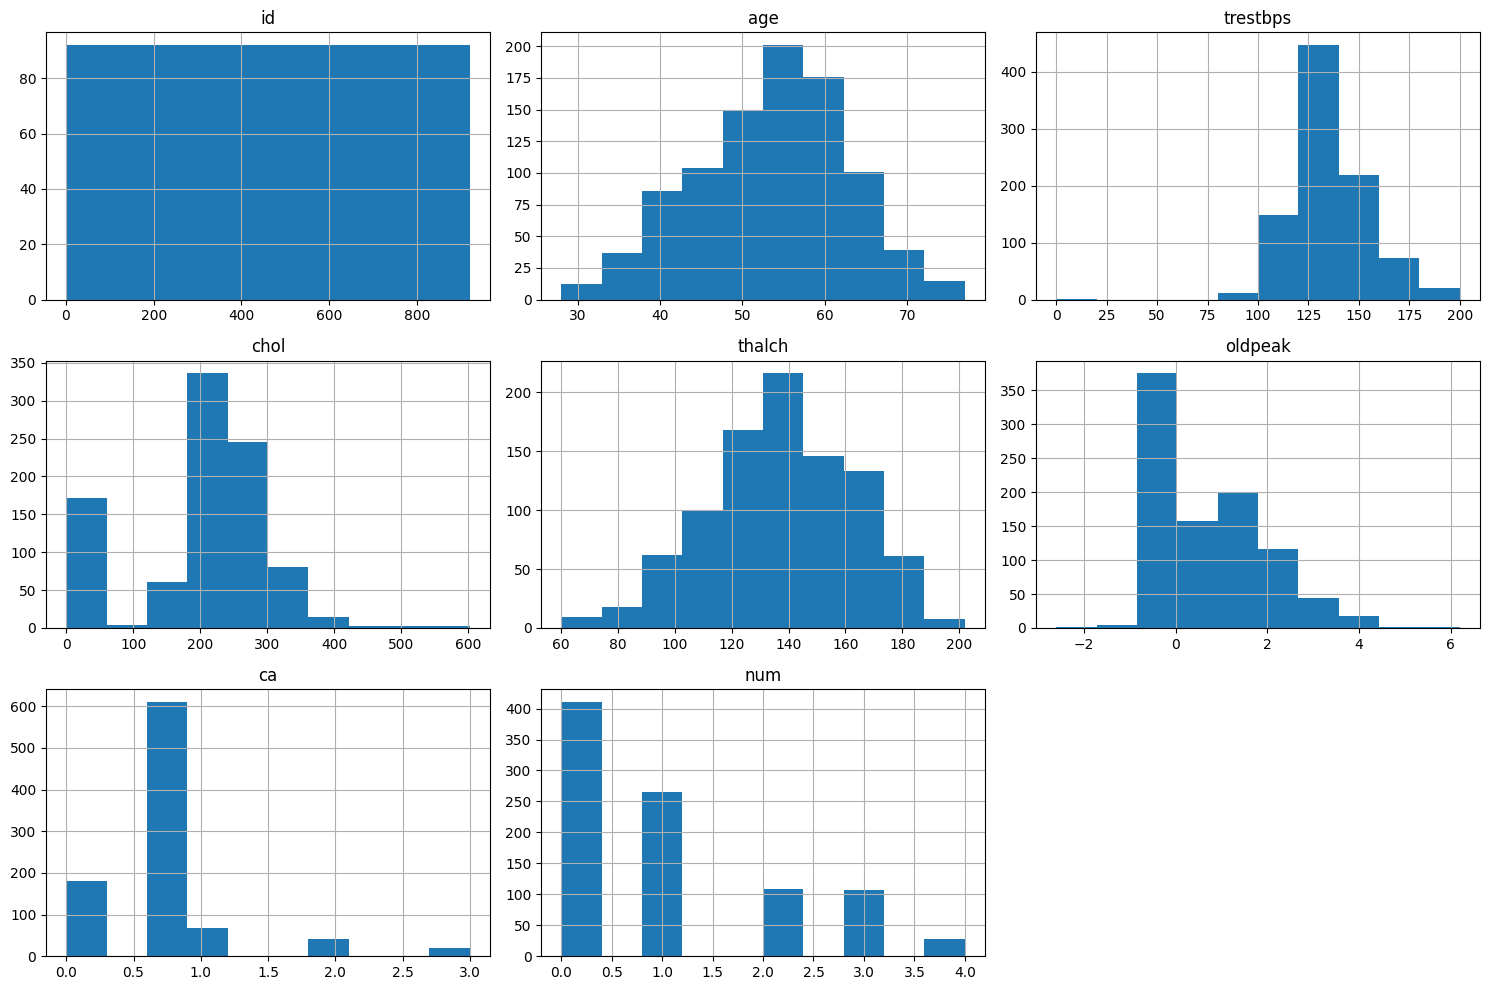

In [15]:
df[numeric_columns].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

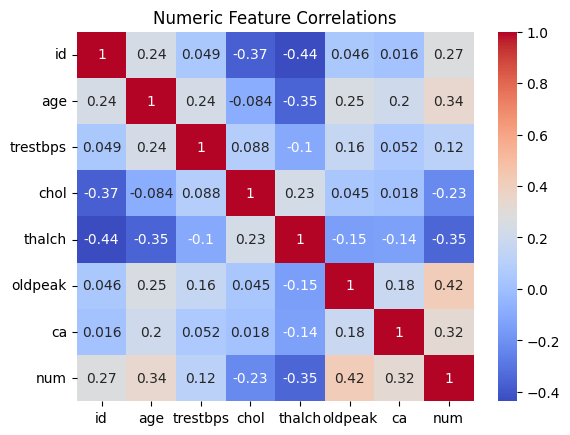

In [16]:
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='coolwarm')
plt.title('Numeric Feature Correlations')
plt.show()

Day 2-Model Training



In [17]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist() #one-hot encoding all 'object' categorical columns
if 'num'in cat_cols:
  cat_cols.remove('num')#don't encode target coloumn.because the answer is having n that coumn.yes/no like

In [18]:
x=df.drop('num',axis=1)#x is the all kinds of inputs,questions we are asking(that answer coloumn)
y=(df['num']>0).astype(int)#0-non disease,1-having disease

In [19]:
x=pd.get_dummies(x,columns=cat_cols)
print("Final feature columns: ",x.columns)

Final feature columns:  Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


Day-3 Advanced models and feature engineering
-Train/test split,normalization,modeling and model evaluation


In [20]:
from sklearn.model_selection import train_test_split#Splits your dataset into training and testing sets.
from sklearn.preprocessing import StandardScaler  #for the same scale Ensures all features are on the same scale, which is important for many ML algorithms (e.g., Logistic Regression, SVM, KNN, Neural Nets).

#📌 What is scikit-learn?

#A free, open-source Python library for machine learning and data analysis.

#Built on top of NumPy, SciPy, and matplotlib.

#Provides simple, consistent APIs to build ML workflows.

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

new value=(x-mean)/standard deviation

In [24]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)#don't use fit in here

In [25]:
from sklearn.linear_model import LogisticRegression#it's about classification.


Supervised Learning

Classification → Output is a category
Algorithms: Logistic Regression, Decision Trees, Random Forest, SVM, Neural Networks.(discrete).
Regression → Output is a continuous value.
Algorithms: Linear Regression, Ridge, Lasso, SVR.

In [27]:
lr_model=LogisticRegression()#giving admission to a new student
lr_model.fit(x_train_scaled,y_train)#training step

LogisticRegression()

model evaluation

In [29]:
from sklearn.metrics import accuracy_score , classification_report#how good the model is

In [30]:
y_pred_lr=lr_model.predict(x_test_scaled)
print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

Logistic Regression Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



Accuracy score-75 to 98 considered to be good.
99/100(100 mostly)-comes when overfitting(not good)

day 4- random forest , and feature importance


In [32]:
from sklearn.metrics import confusion_matrix

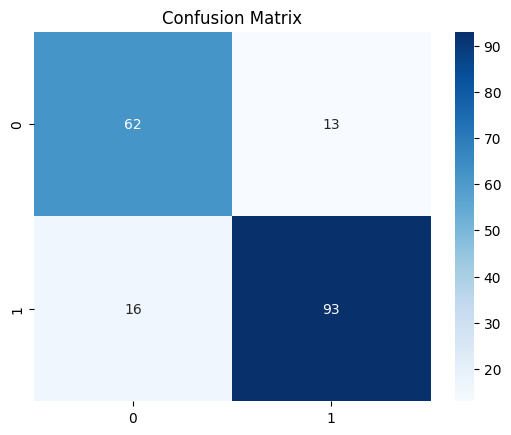

In [33]:
cm= confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train_scaled,y_train)
y_pred_rf=rf_model.predict(x_test_scaled)
print("Random Forest Accuracy:",accuracy_score(y_test,y_pred_rf))


Random Forest Accuracy: 0.8858695652173914


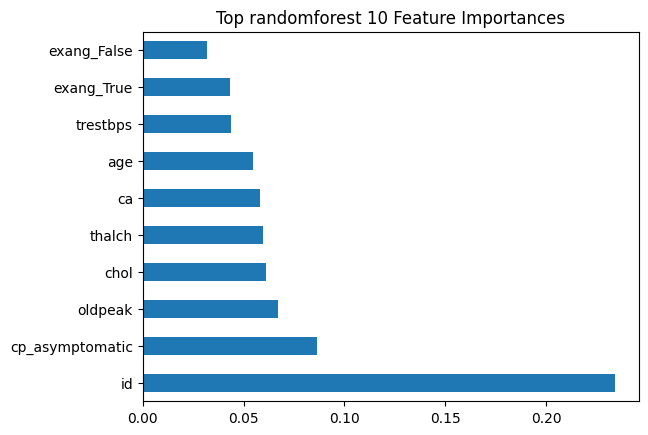

In [36]:
feat_imp=pd.Series(rf_model.feature_importances_,index=x.columns).sort_values(ascending=False)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Top randomforest 10 Feature Importances')
plt.show()


save the model


In [38]:
import joblib
joblib.dump(rf_model,'heart_disease_rf_model.pkl')


['heart_disease_rf_model.pkl']

In [39]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [41]:
sample= x.head(1)
sample.to_csv('Heart-user-template.csv',index=False)
print("user template saved as 'Heart-user-template.csv' ")


user template saved as 'Heart-user-template.csv' 


day-5
User Upload and Prediction


In [42]:
from google.colab import files
files.upload()

Saving heart_dataset.csv to heart_dataset.csv


{'heart_dataset.csv': b'age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina\n58,130,220,1,normal,150,False,1.4,flat,0,fixed defect,0,1,0,0,0,1\n67,160,276,0,lv hypertrophy,108,True,1.5,flat,3,normal,0,1,1,0,0,0\n42,120,230,0,normal,170,False,1.0,upsloping,0,reversable defect,1,0,0,0,1,0\n50,130,210,0,lv hypertrophy,158,False,0.8,flat,0,normal,0,1,0,0,1,0\n45,114,230,0,normal,165,False,1.1,downsloping,0,normal,1,0,0,1,0,0\n'}

In [48]:
import joblib
import pandas as pd

user_df=pd.read_csv('heart_dataset.csv')

#getting column list from training dataframe
numeric_columns=df.select_dtypes(include='number').columns.tolist()
cat_cols=df.select_dtypes(include='object').columns.tolist()
bool_cols=df.select_dtypes(include='bool').columns.tolist()

#droping columns which are extra in user_df than required to avoid error
numeric_columns=[col for col in numeric_columns if col in user_df.columns]
cat_cols=[col for col in cat_cols if col in user_df.columns]
bool_cols=[col for col in bool_cols if col in user_df.columns]

#fill the missing numeric column
user_df[numeric_columns]=user_df[numeric_columns].fillna(user_df[numeric_columns].mean())

for col in cat_cols:
  user_df[col]=user_df[col].fillna('Unknown')

for col in bool_cols:
  user_df[col]=user_df[col].astype(int)

#one-hot encoding
user_df_encoded=pd.get_dummies(user_df,columns=cat_cols)

#allign columns
user_df_encoded=user_df_encoded.reindex(columns=x.columns,fill_value=0)

#scale data
scaler=joblib.load('scaler.pkl')
user_df_scaled=scaler.transform(user_df_encoded)

#prediction
model=joblib.load('heart_disease_rf_model.pkl')
preds=model.predict(user_df_scaled)
user_df['heart disease prediction']=preds
#show result

print(user_df[['heart disease prediction']])




   heart disease prediction
0                         0
1                         1
2                         0
3                         0
4                         0
